In [22]:
import gym
import gym_cube
import numpy as np

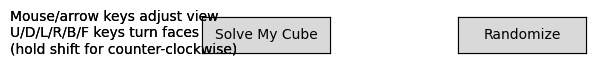

In [23]:
# e = gym.make('env_name')
e = gym.make('cube-v0') 

In [24]:
# reset means scrambled state
state = e.reset(scramble_count=10)

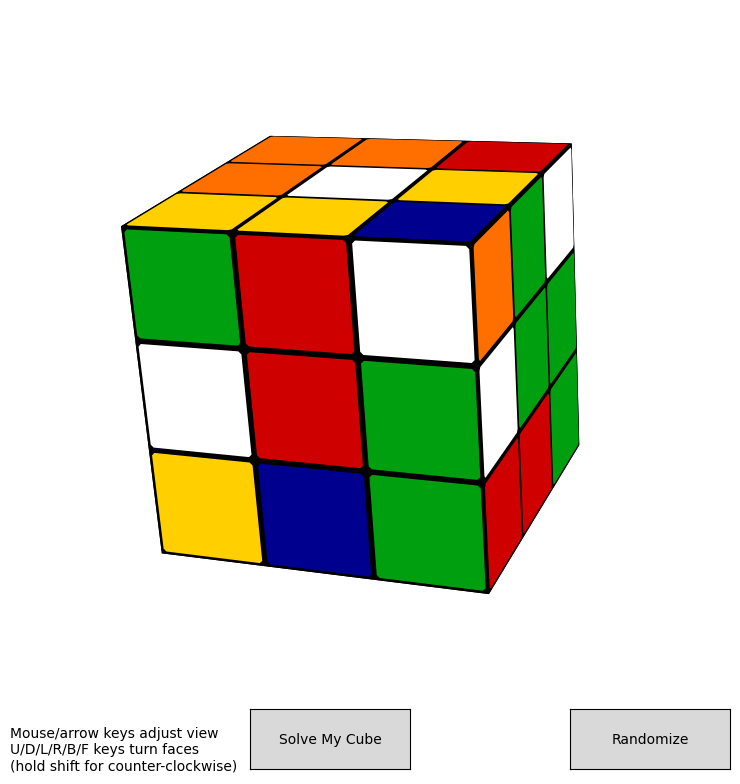

In [25]:
# render the image
e.render()

In [26]:
# action set
# UDFBRLU'D'F'B'R'L'
# 01234567891011

action = np.random.randint(12)
action_dict = {0: "U", 1: "D", 2: "F", 3: "B", 4: "R", 5: "L", 6: "U'", 7: "D'", 8: "F'", 9:"B'", 10:"R'", 11: "L'"}
print(action_dict[action])

F


In [27]:
# e.step(action)
# if the cube is solved, done -> 1, reward -> 1 else done -> 0, reward -> -1
next_state, reward, done, info = e.step(action)
print("Reward: ", reward)
print("Done: ", done)

Reward:  0
Done:  -1


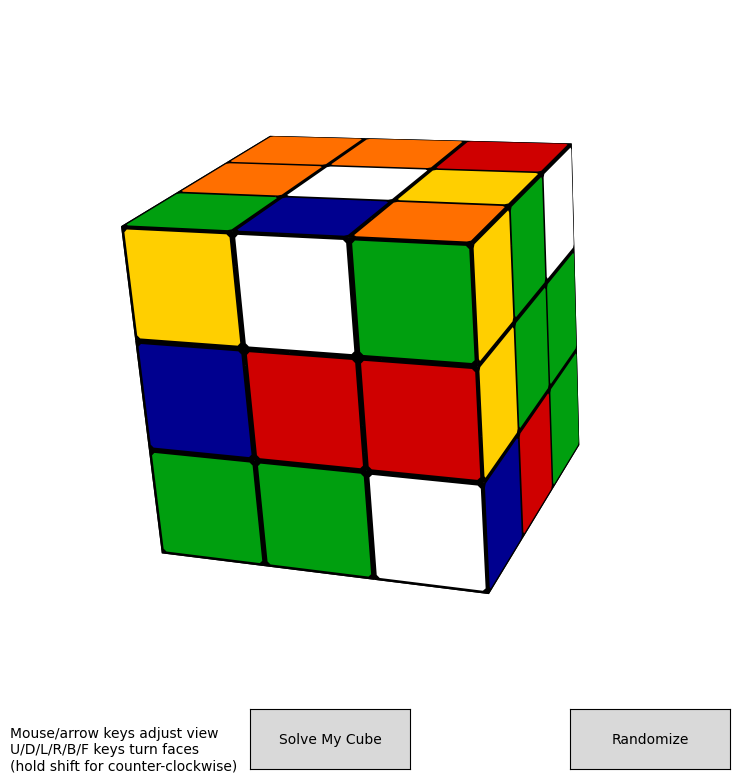

In [28]:
e.render()

8


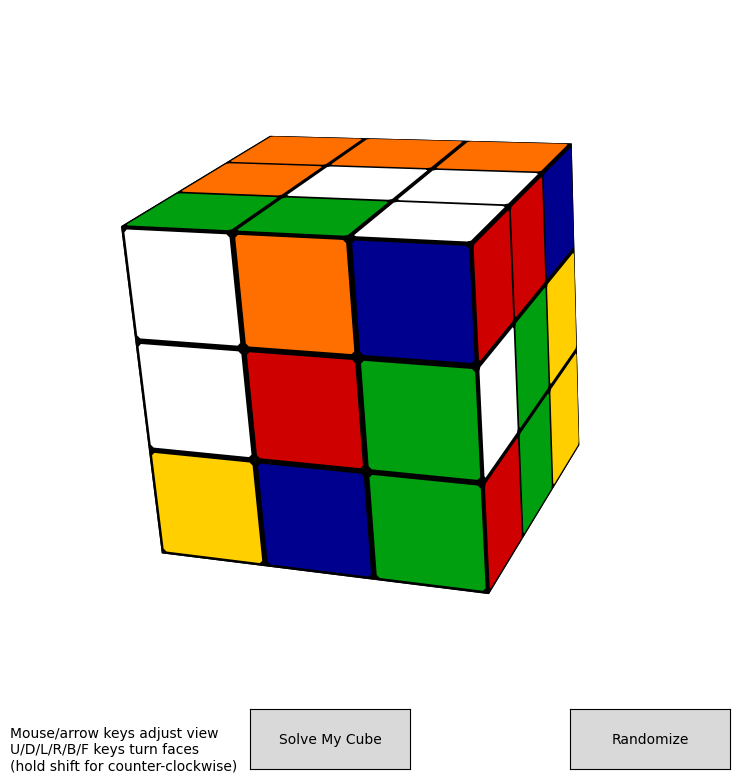

In [31]:
if action < 6:
    reverse  = action + 6
else:
    reverse = action -6
print(reverse)
e.step(reverse)
e.render()

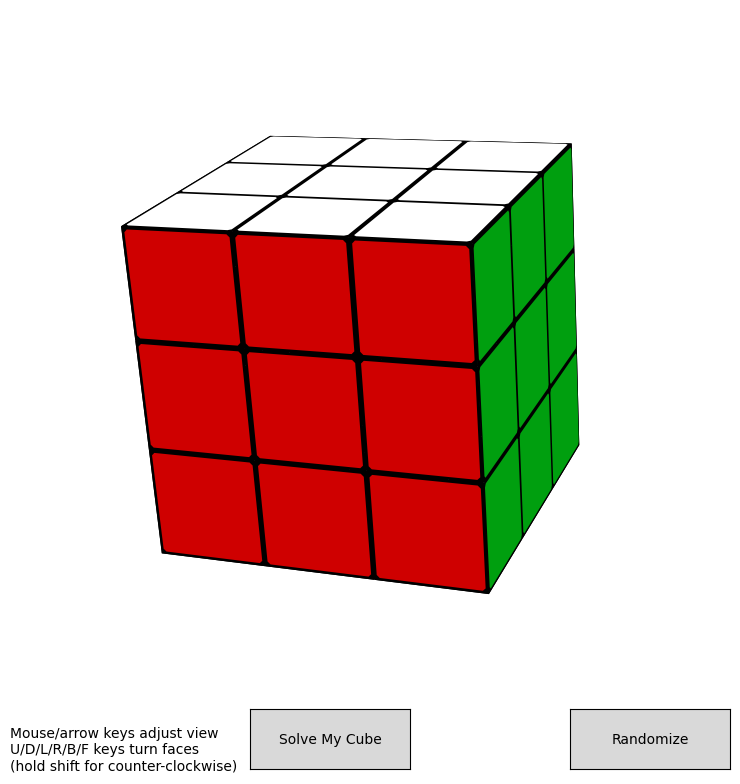

In [32]:
e.initialize()
e.render()